In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
dataset = pd.read_csv("../Datasets/Customers/appdata10.csv")
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [10]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## Data cleaning

In [3]:
dataset["hour"] = dataset["hour"].str.slice(1, 3).astype(int)
# Gets the hour (2 first numbers)

## Plotting

In [4]:
# Only numeric fields
dataset2 = dataset.drop(["user", "screen_list", "enrolled_date", "first_open", "enrolled"], axis=1)
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


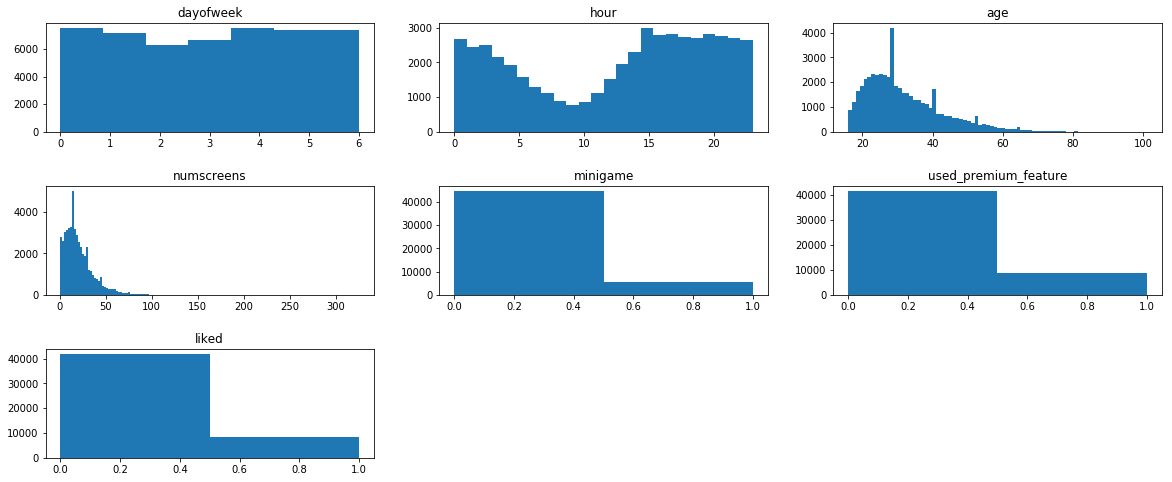

In [40]:
figure = plt.figure(figsize=(20,8))

i = 1

for col in dataset2.columns:
    plt.subplot(3,3,i)
    plt.title(col)
    values = np.size(dataset2[col].unique())
    plt.hist(dataset2[col], bins=values)
    plt.subplots_adjust(hspace=0.5)
    i += 1

## Correlation with Response

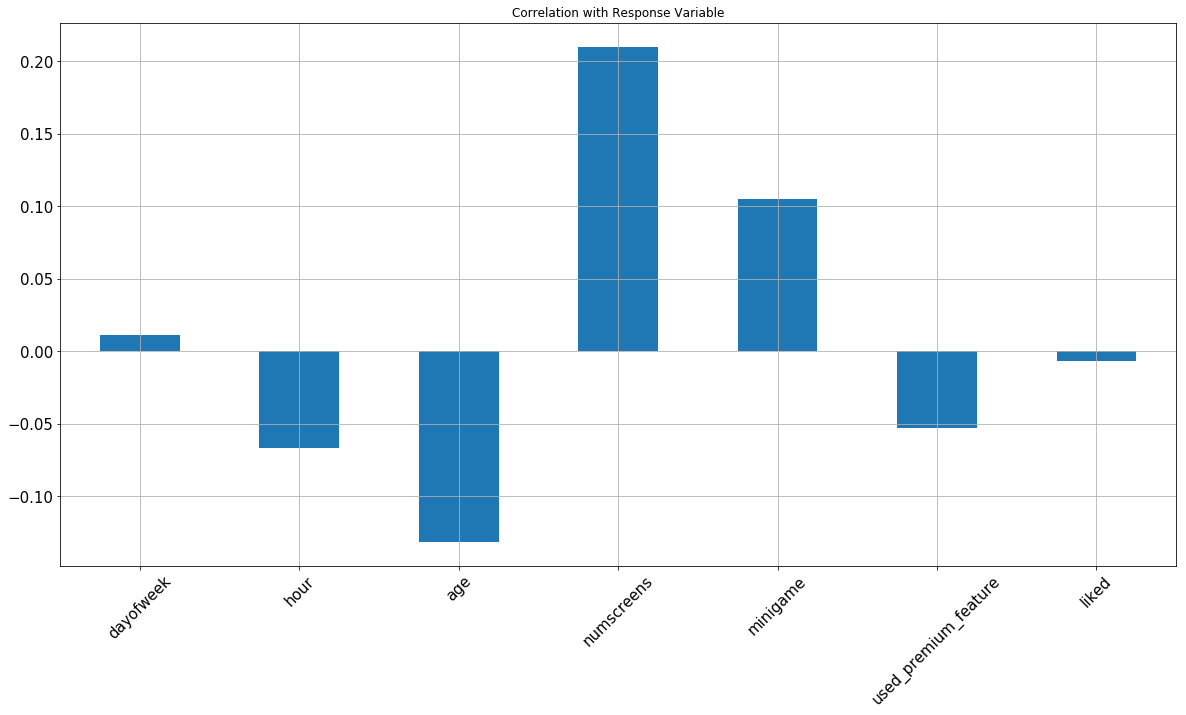

In [47]:
dataset2.corrwith(dataset["enrolled"]).plot.bar(figsize=(20,10),
                                               title="Correlation with Response Variable",
                                               fontsize=15,
                                               rot=45,
                                               grid=True)

## Correlation matrix

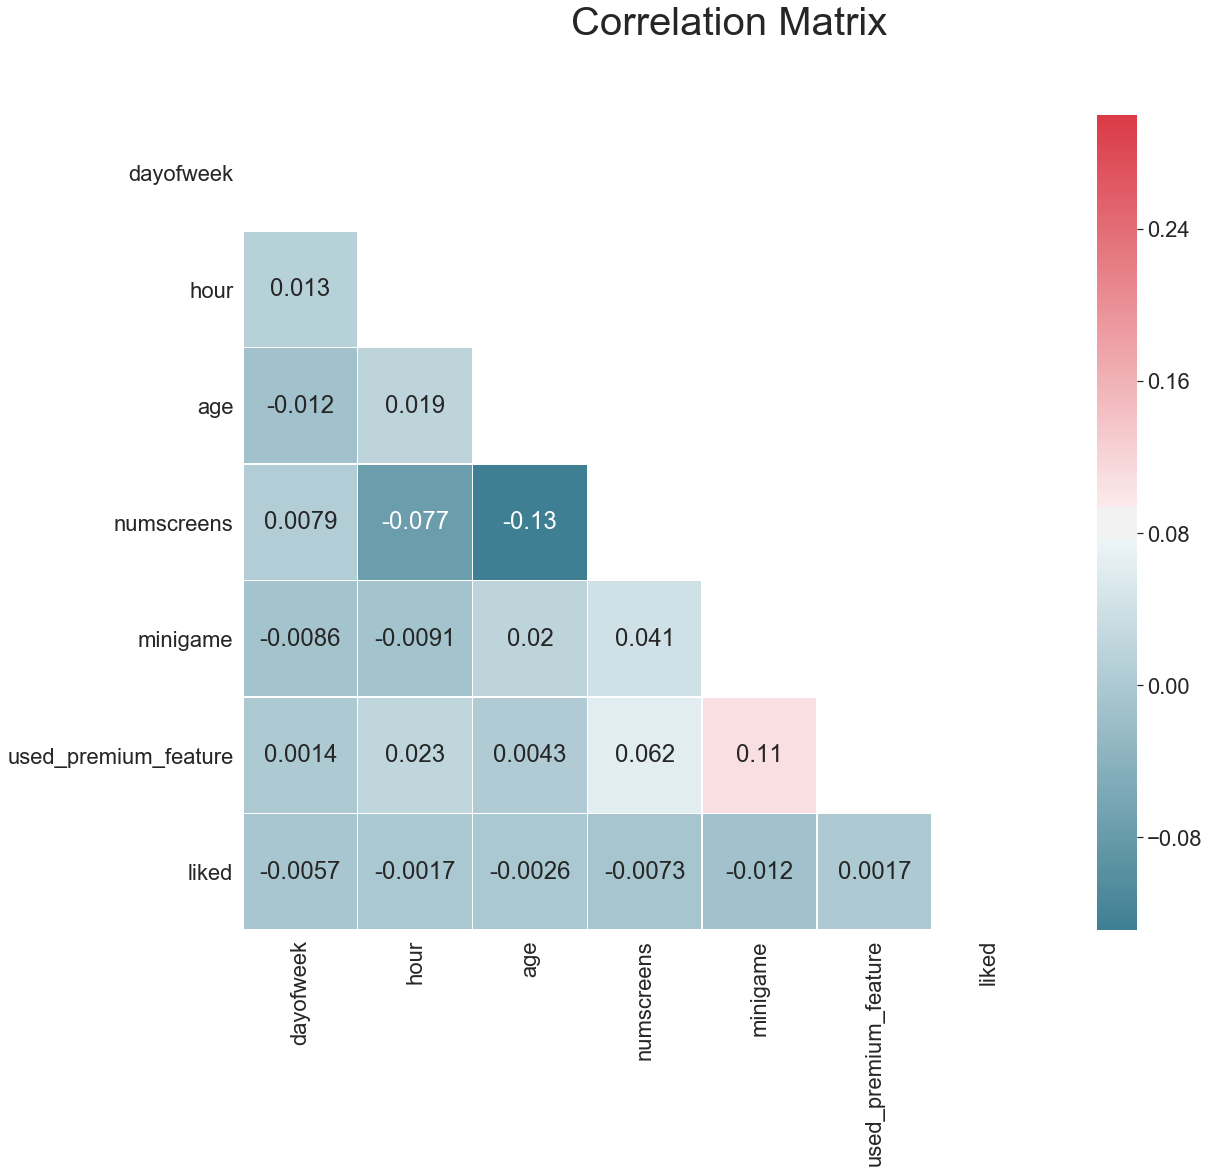

In [67]:
sns.set(style="white", font_scale=2)
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(18,15))
fig.suptitle("Correlation Matrix", fontsize=40)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=0.3, linewidths=0.5)


## Feature Engineering

In [68]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [5]:
dataset["first_open"] = [parser.parse(date) for date in dataset["first_open"]]

In [6]:
dataset["enrolled_date"] = [parser.parse(date) if isinstance(date, str) else date for date in dataset["enrolled_date"]]

In [74]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [7]:
dataset["differences"] = (dataset.enrolled_date - dataset.first_open).astype("timedelta64[h]")

Text(0.5, 1.0, 'Distribution of Time-Since-Enrolled')

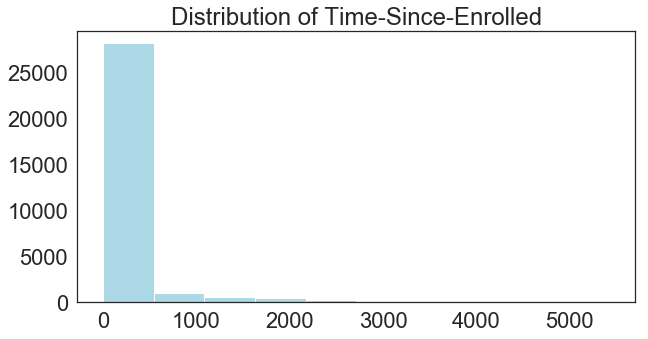

In [82]:
figure = plt.figure(figsize=(10,5))
plt.hist(dataset["differences"].dropna(), color="lightblue")
plt.title("Distribution of Time-Since-Enrolled")

Text(0.5, 1.0, 'Distribution of Time-Since-Enrolled')

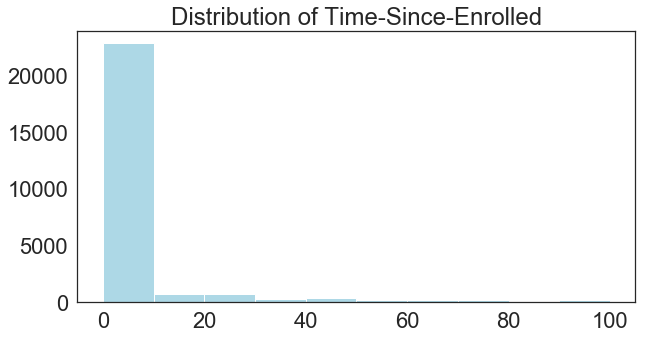

In [83]:
figure = plt.figure(figsize=(10,5))
plt.hist(dataset["differences"].dropna(), color="lightblue", range=[0, 100])
plt.title("Distribution of Time-Since-Enrolled")

In [8]:
dataset.loc[dataset.differences > 48, "enrolled"] = 0

In [9]:
dataset.drop(["differences", "enrolled_date", "first_open"], inplace=True, axis=1)

## Formatting the screen_list field

In [10]:
top_screens_df = pd.read_csv("../Datasets/Customers/top_screens.csv")
top_screens_df.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [11]:
top_screens = top_screens_df["top_screens"].values

In [12]:
dataset["screen_list"] = dataset["screen_list"].astype(str) + ","

for sc in top_screens:
    dataset[sc] = dataset["screen_list"].str.contains(sc).astype(int) # boolean
    dataset["screen_list"] = dataset.screen_list.str.replace(sc + ",", "")

In [13]:
dataset["Other"] = dataset.screen_list.str.count(",")

In [14]:
dataset.drop(["screen_list"], axis=1, inplace=True)

In [16]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [17]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


## Funnels

Group of screens that belong to the same set

In [18]:
saving_screens = ["Saving1", "Saving2", "Saving2Amount", "Saving4", "Saving5", "Saving6", "Saving7", "Saving8", "Saving9", "Saving10"]
dataset["SavingsCounts"] = dataset[saving_screens].sum(axis=1)
dataset.drop(saving_screens, axis=1, inplace=True)

In [19]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCounts
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0


# Modeling

## Data Preprocessing

In [20]:
response = dataset["enrolled"]

In [21]:
dataset.drop("enrolled", axis=1, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2)

In [24]:
train_identifier = X_train["user"]

In [25]:
X_train.drop("user", axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
test_identifier = X_test["user"]
X_test.drop("user", axis=1, inplace=True)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc_X = StandardScaler()

In [31]:
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
X_test_scaled = pd.DataFrame(sc_X.fit_transform(X_test))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.016615,1.138883,-0.529747,-1.082849,2.875759,-0.456173,-0.443559,-1.012326,-1.033459,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,-0.598446,-0.260298
1,0.476784,0.736234,1.322451,-1.082849,-0.347734,-0.456173,-0.443559,0.987824,-1.033459,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,10.947416,-0.087656,-1.414490,-0.260298
2,0.476784,-1.277012,-1.178017,0.314322,-0.347734,-0.456173,-0.443559,-1.012326,0.967624,-0.643372,...,6.782590,3.075752,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,0.489613,1.156384
3,0.970183,1.407316,1.044622,0.060291,-0.347734,-0.456173,-0.443559,0.987824,0.967624,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,-0.054417,-0.260298
4,1.463582,-0.069064,1.878111,0.822384,-0.347734,-0.456173,-0.443559,0.987824,0.967624,1.554311,...,-0.147436,-0.325124,8.309786,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,0.489613,-0.260298


In [35]:
X_train_scaled.columns = X_train.columns.values
X_train_scaled.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,Loan2,location,Institutions,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCounts
0,-0.016615,1.138883,-0.529747,-1.082849,2.875759,-0.456173,-0.443559,-1.012326,-1.033459,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,-0.598446,-0.260298
1,0.476784,0.736234,1.322451,-1.082849,-0.347734,-0.456173,-0.443559,0.987824,-1.033459,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,10.947416,-0.087656,-1.414490,-0.260298
2,0.476784,-1.277012,-1.178017,0.314322,-0.347734,-0.456173,-0.443559,-1.012326,0.967624,-0.643372,...,6.782590,3.075752,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,0.489613,1.156384
3,0.970183,1.407316,1.044622,0.060291,-0.347734,-0.456173,-0.443559,0.987824,0.967624,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,-0.054417,-0.260298
4,1.463582,-0.069064,1.878111,0.822384,-0.347734,-0.456173,-0.443559,0.987824,0.967624,1.554311,...,-0.147436,-0.325124,8.309786,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,0.489613,-0.260298


In [36]:
X_test_scaled.columns = X_test.columns.values
X_test_scaled.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,Loan2,location,Institutions,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCounts
0,-0.494287,0.849353,-0.715166,-0.400891,-0.347237,-0.454333,2.230183,-1.014911,0.955011,-0.650448,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,-0.11742,-0.089235,-0.086343,0.472772,-0.257362
1,-0.007113,1.120184,1.317343,0.812596,-0.347237,-0.454333,-0.448394,-1.014911,-1.047108,-0.650448,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,-0.11742,-0.089235,-0.086343,0.472772,5.539081
2,-1.468636,-1.046464,2.148824,0.301654,-0.347237,-0.454333,-0.448394,0.985308,0.955011,-0.650448,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,-0.11742,-0.089235,-0.086343,-0.074133,-0.257362
3,0.480062,1.120184,2.056437,0.748728,-0.347237,2.201031,-0.448394,0.985308,-1.047108,1.537402,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,8.51642,-0.089235,-0.086343,-0.894491,-0.257362
4,0.967236,0.443107,-0.899939,-0.911833,-0.347237,-0.454333,-0.448394,0.985308,-1.047108,1.537402,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,-0.11742,-0.089235,-0.086343,-0.894491,-0.257362


In [37]:
X_train_scaled.index = X_train.index.values
X_train_scaled.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,Loan2,location,Institutions,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCounts
540,-0.016615,1.138883,-0.529747,-1.082849,2.875759,-0.456173,-0.443559,-1.012326,-1.033459,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,-0.598446,-0.260298
41375,0.476784,0.736234,1.322451,-1.082849,-0.347734,-0.456173,-0.443559,0.987824,-1.033459,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,10.947416,-0.087656,-1.414490,-0.260298
42563,0.476784,-1.277012,-1.178017,0.314322,-0.347734,-0.456173,-0.443559,-1.012326,0.967624,-0.643372,...,6.782590,3.075752,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,0.489613,1.156384
22563,0.970183,1.407316,1.044622,0.060291,-0.347734,-0.456173,-0.443559,0.987824,0.967624,-0.643372,...,-0.147436,-0.325124,-0.120340,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,-0.054417,-0.260298
42587,1.463582,-0.069064,1.878111,0.822384,-0.347734,-0.456173,-0.443559,0.987824,0.967624,1.554311,...,-0.147436,-0.325124,8.309786,-0.128021,-0.116211,-0.116321,-0.091346,-0.087656,0.489613,-0.260298


In [39]:
X_test_scaled.index = X_test.index.values
X_test_scaled.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,Loan2,location,Institutions,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCounts
9586,-0.494287,0.849353,-0.715166,-0.400891,-0.347237,-0.454333,2.230183,-1.014911,0.955011,-0.650448,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,-0.11742,-0.089235,-0.086343,0.472772,-0.257362
21434,-0.007113,1.120184,1.317343,0.812596,-0.347237,-0.454333,-0.448394,-1.014911,-1.047108,-0.650448,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,-0.11742,-0.089235,-0.086343,0.472772,5.539081
10754,-1.468636,-1.046464,2.148824,0.301654,-0.347237,-0.454333,-0.448394,0.985308,0.955011,-0.650448,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,-0.11742,-0.089235,-0.086343,-0.074133,-0.257362
38919,0.480062,1.120184,2.056437,0.748728,-0.347237,2.201031,-0.448394,0.985308,-1.047108,1.537402,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,8.51642,-0.089235,-0.086343,-0.894491,-0.257362
18483,0.967236,0.443107,-0.899939,-0.911833,-0.347237,-0.454333,-0.448394,0.985308,-1.047108,1.537402,...,-0.145388,-0.334074,-0.119159,-0.129126,-0.116542,-0.11742,-0.089235,-0.086343,-0.894491,-0.257362


## Training and testing

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
classifier = LogisticRegression(random_state=0, penalty="l1") 
# L1 penalization is very important in models ind which you are working with mobile app screens

In [44]:
classifier.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
classifier.score(X_test_scaled, y_test)

0.7717

In [47]:
y_pred = classifier.predict(X_test_scaled)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [65]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred)
# Recall = True positives / (True positives + false negatives)

Test Data Accuracy: 77.1700


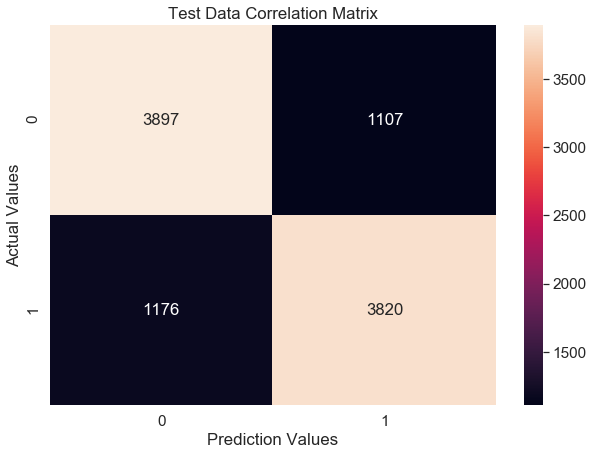

In [73]:
cm_df = pd.DataFrame(cm, index=(0,1), columns=(0,1))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cm_df, annot=True, fmt="g")
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title("Test Data Correlation Matrix")
print("Test Data Accuracy: {:.4f}".format(accurary*100))

## Cross validation

In [74]:
from sklearn.model_selection import cross_val_score

In [80]:
accuracies = cross_val_score(estimator=classifier, X=X_train_scaled, y=y_train, cv=10)
print("Logistic Accuracy: {:.3f} (+/- {:.3f})".format(accuracies.mean(), accuracies.std()*2))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Accuracy: 0.773 (+/- 0.011)


# Formatting the Final Results

In [81]:
df = pd.concat([y_test, test_identifier], axis=1).dropna()
df.head()

,enrolled,user
9586,1,163592
21434,0,109224
10754,0,35032
38919,0,217694
18483,0,147443


In [82]:
df["predicted_results"] = y_pred
df.head()

,enrolled,user,predicted_results
9586,1,163592,1
21434,0,109224,1
10754,0,35032,0
38919,0,217694,0
18483,0,147443,0


In [84]:
df = df[["user", "predicted_results", "enrolled"]].reset_index(drop=True)
df.head(10)

,user,predicted_results,enrolled
0,163592,1,1
1,109224,1,0
2,35032,0,0
3,217694,0,0
4,147443,0,0
5,165774,0,0
6,54340,0,0
7,88518,0,0
8,96207,1,1
9,210796,1,1
